In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
! git clone https://github.com/nobi1007/HandTalk.git

Cloning into 'HandTalk'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 28 (delta 7), reused 16 (delta 3), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [6]:
! ls HandTalk

baseTemplate.xd    material-icons-from-SkylerWestby.xd	sign_mnist_test.csv
just_a_sample.jpg  README.md				sign_mnist_train.csv


In [0]:
train_data = pd.read_csv('./HandTalk/sign_mnist_train.csv')
test_data = pd.read_csv('./HandTalk/sign_mnist_test.csv')


In [8]:
train_data.head()
train_data.shape

(27455, 785)

In [9]:
train_labels = train_data['label'].values
unique_val = np.array(train_labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

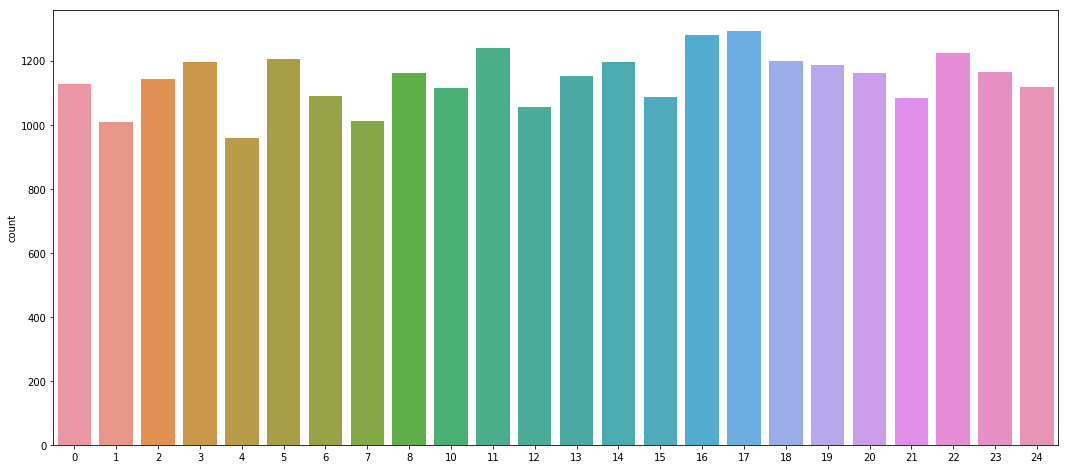

In [76]:
plt.figure(figsize = (18,8))
sns.countplot(x =train_labels)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
train_data.drop('label', axis = 1, inplace = True)

In [0]:
images = train_data.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(train_labels)

In [0]:
plt.imshow(images[0].reshape(28,28))

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

Using TensorFlow backend.


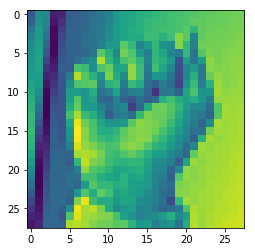

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 50

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

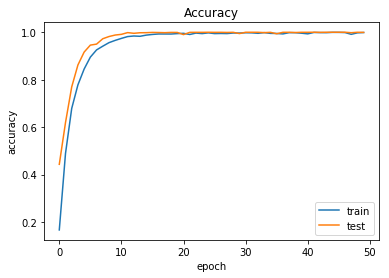

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [0]:
test = pd.read_csv('./HandTalk/sign_mnist_test.csv')


In [0]:
test_labels = test['label']

In [0]:
test.drop('label', axis = 1, inplace = True)

In [0]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [0]:
test_labels = label_binrizer.fit_transform(test_labels)

In [0]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [25]:
test_images.shape

(7172, 28, 28, 1)

In [0]:
y_pred = model.predict(test_images)

In [0]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(test_labels, y_pred.round())

0.8452314556609035

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


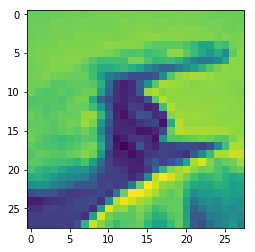

In [29]:
plt.imshow(test_images[0].reshape(28,28))
print(test_labels[0])

In [30]:
y_pred[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
model.summary()
model.save('first_handTalk.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [0]:
new_model = keras.models.load_model('first_handTalk.h5')
new_model.summary()

In [0]:
x2 = test_images[:1]
x2.shape
new_model.predict(x2)


In [75]:
x = test_images[0]
np.shape(x)
x1 = np.reshape(x,(1,28,28,1))
print(np.shape(x1))
new_model.predict(x1)

(1, 28, 28, 1)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)